<a href="https://colab.research.google.com/github/OMKARTT/TMLC/blob/main/DataPath_TMLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='18Q8K9r8hA8D8P0S0dEg_SJOquz5sqEw2',
                                    dest_path='./flower_data.zip',
                                    unzip=True)

Unzipping...Done.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
import tarfile, zipfile
import os

In [4]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz

--2021-10-27 15:20:06--  https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.154.14
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.154.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345236087 (329M) [application/x-tar]
Saving to: ‘oxford-102-flowers.tgz’

oxford-102-flowers. 100%[===================>] 329.24M  49.3MB/s    in 7.1s    

2021-10-27 15:20:13 (46.5 MB/s) - ‘oxford-102-flowers.tgz’ saved [345236087/345236087]



In [5]:
import tarfile
fname="/content/oxford-102-flowers.tgz"
if fname.endswith(".tgz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [6]:
os.mkdir("/content/dataset/")
os.mkdir("/content/dataset/train")
os.mkdir("/content/dataset/test")
os.mkdir("/content/dataset/Valid")

In [28]:
os.mkdir("/content/dataset/Valid")

In [7]:
for i in range(1,103):
  os.mkdir("/content/dataset/train/"+str(i))
  os.mkdir("/content/dataset/test/"+str(i))
  os.mkdir("/content/dataset/valid/"+str(i))

In [8]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from tensorflow.python.framework import dtypes

#File containing the path to images and the labels [path/to/images label]
Train_filename = '/content/oxford-102-flowers/train.txt'
Test_filename = '/content/oxford-102-flowers/test.txt'
Valid_filename = '/content/oxford-102-flowers/valid.txt'

#Lists where to store the paths and labels
train_filenames = []
train_labels = []
test_filenames = []
test_labels = []
valid_filenames = []
valid_labels = []

#Reading file and extracting paths and labels
with open(Train_filename, 'r') as File:
    infoFile = File.readlines() #Reading all the lines from File
    for line in infoFile: #Reading line-by-line
        words = line.split() #Splitting lines in words using space character as separator
        train_filenames.append(words[0])
        train_labels.append(int(words[1]))

with open(Test_filename, 'r') as File:
    infoFile = File.readlines() #Reading all the lines from File
    for line in infoFile: #Reading line-by-line
        words = line.split() #Splitting lines in words using space character as separator
        test_filenames.append(words[0])
        test_labels.append(int(words[1]))

with open(Valid_filename, 'r') as File:
    infoFile = File.readlines() #Reading all the lines from File
    for line in infoFile: #Reading line-by-line
        words = line.split() #Splitting lines in words using space character as separator
        valid_filenames.append(words[0])
        valid_labels.append(int(words[1]))

TrainFile = len(train_filenames)
TestFile = len(test_filenames)
ValidFile = len(valid_filenames)

In [9]:
print(TrainFile)
print(TestFile)
print(ValidFile)

1020
6149
1020


In [10]:
#tfilenames = ops.convert_to_tensor(filenames, dtype=dtypes.string)
#tlabels = ops.convert_to_tensor(labels, dtype=dtypes.int32)

In [11]:
import shutil, os
from tqdm.notebook import tqdm

In [12]:
for i in tqdm(range(len(train_labels))):
  n=train_labels[i]
  image_name=train_filenames[i]
  dl_path='/content/oxford-102-flowers'
  path='/'.join([dl_path,image_name])
  dst_path='/content/dataset/train'
  #print(path)
  dst=str(n)
  dst_dir='/'.join([dst_path,dst])
  shutil.copy(path, dst_dir)


  0%|          | 0/1020 [00:00<?, ?it/s]

In [13]:
for i in tqdm(range(len(test_labels))):
  n=test_labels[i]
  image_name=test_filenames[i]
  dl_path='/content/oxford-102-flowers'
  path='/'.join([dl_path,image_name])
  dst_path='/content/dataset/test'
  #print(path)
  dst=str(n)
  dst_dir='/'.join([dst_path,dst])
  shutil.copy(path, dst_dir)

  0%|          | 0/6149 [00:00<?, ?it/s]

In [30]:
for i in tqdm(range(len(valid_labels))):
  n=valid_labels[i]
  image_name=valid_filenames[i]
  dl_path='/content/oxford-102-flowers'
  path='/'.join([dl_path,image_name])
  dst_path='/content/dataset/Valid'
  #print(path)
  #dst=str(n)
  #dst_dir='/'.join([dst_path,dst])
  shutil.copy(path, dst_path)

  0%|          | 0/1020 [00:00<?, ?it/s]

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.optimizers import Adam
from keras import initializers
#from keras.utils import plot_model, np_utils
from keras import backend as K
from google.colab.patches import cv2_imshow
##used for transfer learning
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
testing_set=test_datagen.flow_from_directory('/content/dataset/train',shuffle=True,target_size=(224,224),batch_size=10,class_mode='binary')
training_set=train_datagen.flow_from_directory('/content/dataset/test',shuffle=True ,target_size=(224,224),batch_size=20,class_mode='binary')

Found 1010 images belonging to 102 classes.
Found 6129 images belonging to 102 classes.


In [19]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_RES = 224

model = tf.keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))
])
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(102, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
history = model.fit_generator(training_set, epochs=10, validation_data = testing_set, verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
307/307 [==============================] - 83s 166ms/step - loss: 1.6816 - accuracy: 0.6513 - val_loss: 0.8581 - val_accuracy: 0.8020
Epoch 2/10
307/307 [==============================] - 51s 167ms/step - loss: 0.4368 - accuracy: 0.9186 - val_loss: 0.5948 - val_accuracy: 0.8535
Epoch 3/10
307/307 [==============================] - 51s 166ms/step - loss: 0.2415 - accuracy: 0.9617 - val_loss: 0.5257 - val_accuracy: 0.8693
Epoch 4/10
307/307 [==============================] - 51s 166ms/step - loss: 0.1546 - accuracy: 0.9791 - val_loss: 0.5119 - val_accuracy: 0.8634
Epoch 5/10
307/307 [==============================] - 51s 167ms/step - loss: 0.1064 - accuracy: 0.9884 - val_loss: 0.4351 - val_accuracy: 0.8812
Epoch 6/10
307/307 [==============================] - 51s 166ms/step - loss: 0.0765 - accuracy: 0.9948 - val_loss: 0.4196 - val_accuracy: 0.8782
Epoch 7/10
307/307 [==============================] - 51s 167ms/step - loss: 0.0576 - accuracy: 0.9979 - val_loss: 0.4118 - val_ac

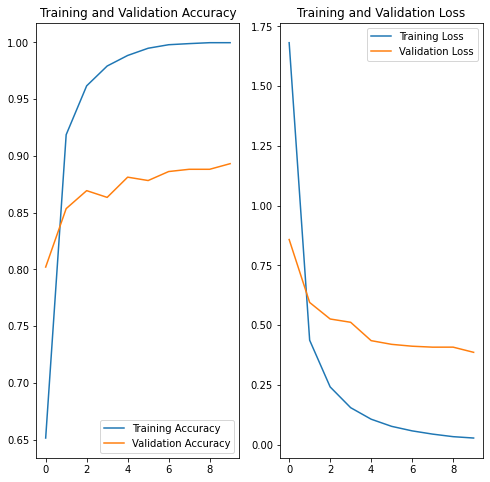

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()